In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/store5.csv')

In [3]:
data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.0,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.0,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.0,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.0,0,NaN
4,1456,2013-01-01,5,BOOKS,0.0,0,NaN


In [4]:
data = data.drop(['id','store_nbr','dcoilwtico'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         55572 non-null  object 
 1   family       55572 non-null  object 
 2   sales        55572 non-null  float64
 3   onpromotion  55572 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         55572 non-null  datetime64[ns]
 1   family       55572 non-null  object        
 2   sales        55572 non-null  float64       
 3   onpromotion  55572 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
data.describe()

,date,sales,onpromotion
count,55572,55572.000000,55572.000000
mean,2015-04-24 08:27:04.703088128,280.580231,2.687864
min,2013-01-01 00:00:00,0.000000,0.000000
25%,2014-02-26 18:00:00,1.000000,0.000000
50%,2015-04-24 12:00:00,19.000000,0.000000
75%,2016-06-19 06:00:00,237.000000,0.000000
max,2017-08-15 00:00:00,8216.620000,182.000000
std,NaN,652.588149,11.748996


In [8]:
family_sales = data.groupby('family')['sales'].sum()
family_sales

family
AUTOMOTIVE                    9.194000e+03
BABY CARE                     2.150000e+02
BEAUTY                        8.684000e+03
BEVERAGES                     2.533831e+06
BOOKS                         2.300000e+02
BREAD/BAKERY                  6.428546e+05
CELEBRATION                   2.617600e+04
CLEANING                      1.667748e+06
DAIRY                         8.712830e+05
DELI                          4.152710e+05
EGGS                          1.908510e+05
FROZEN FOODS                  2.696692e+05
GROCERY I                     5.262682e+06
GROCERY II                    3.324100e+04
HARDWARE                      1.725000e+03
HOME AND KITCHEN I            3.010700e+04
HOME AND KITCHEN II           3.723800e+04
HOME APPLIANCES               9.260000e+02
HOME CARE                     2.392830e+05
LADIESWEAR                    1.481300e+04
LAWN AND GARDEN               4.970000e+03
LINGERIE                      3.156100e+04
LIQUOR,WINE,BEER              1.104140e+05
MAGA

In [9]:
def filter_family(df: pd.DataFrame, family: str) -> pd.DataFrame:
    return df.query(f"family == '{family}'").reset_index(drop=True)

**Poultry Family**

In [10]:
print(data['family'])

0                        AUTOMOTIVE
1                         BABY CARE
2                            BEAUTY
3                         BEVERAGES
4                             BOOKS
                    ...            
55567                       POULTRY
55568                PREPARED FOODS
55569                       PRODUCE
55570    SCHOOL AND OFFICE SUPPLIES
55571                       SEAFOOD
Name: family, Length: 55572, dtype: object


In [11]:
# Cek Jumlah nilai 0
for col in data.columns:
    zero_data = data[data[col] == 0]
    num_zeros = len(zero_data)
    percent_zero = (num_zeros / len(data)) * 100
    print(f"{col}: {num_zeros} zeros ({percent_zero:.2f}%)")


date: 0 zeros (0.00%)
family: 0 zeros (0.00%)
sales: 12414 zeros (22.34%)
onpromotion: 42357 zeros (76.22%)


In [12]:
data_poultry = filter_family(data,"POULTRY")
data_poultry.head()

,date,family,sales,onpromotion
0,2013-01-01,POULTRY,0.00000,0
1,2013-01-02,POULTRY,311.91300,0
2,2013-01-03,POULTRY,196.45900,0
3,2013-01-04,POULTRY,167.29599,0
4,2013-01-05,POULTRY,226.04400,0


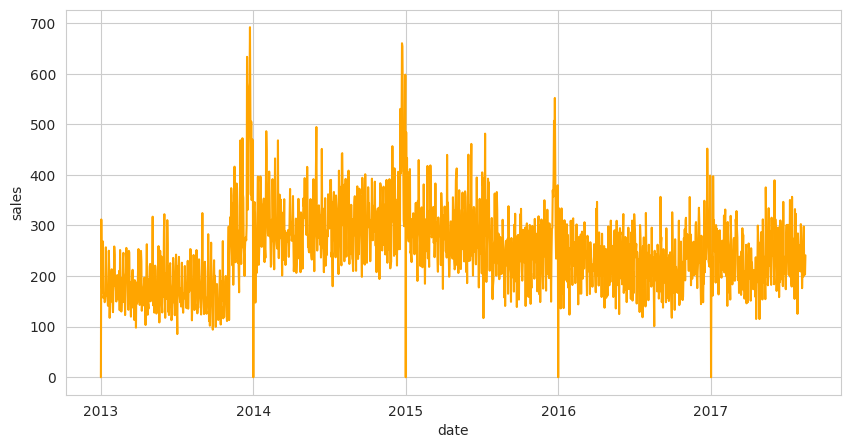

In [13]:
# Plot Sales Poultry Family
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.lineplot(data=data_poultry, x="date", y="sales", color="orange")
plt.show()

In [14]:
# Cek Nilai 0
for col in data.columns:
    zero_data = data[(data['family'] == 'POULTRY') & (data[col] == 0)]
    non_zero_data = data[(data['family'] == 'POULTRY') & (data[col]!= 0)]
    total_poultry = len(data[data['family'] == 'POULTRY'])

    print(f"Column: {col}")
    print(f"Number of zeros: {len(zero_data)} ({(len(zero_data) / total_poultry) * 100:.2f}%)")
    print(f"Number of non-zeros: {len(non_zero_data)} ({(len(non_zero_data) / total_poultry) * 100:.2f}%)")
    print(f"Total POULTRY rows: {total_poultry}")
    print("-----")

Column: date
Number of zeros: 0 (0.00%)
Number of non-zeros: 1684 (100.00%)
Total POULTRY rows: 1684
-----
Column: family
Number of zeros: 0 (0.00%)
Number of non-zeros: 1684 (100.00%)
Total POULTRY rows: 1684
-----
Column: sales
Number of zeros: 5 (0.30%)
Number of non-zeros: 1679 (99.70%)
Total POULTRY rows: 1684
-----
Column: onpromotion
Number of zeros: 1215 (72.15%)
Number of non-zeros: 469 (27.85%)
Total POULTRY rows: 1684
-----


Pada kolom Sales nilai 0 hanya 0.3%

<Axes: xlabel='date'>

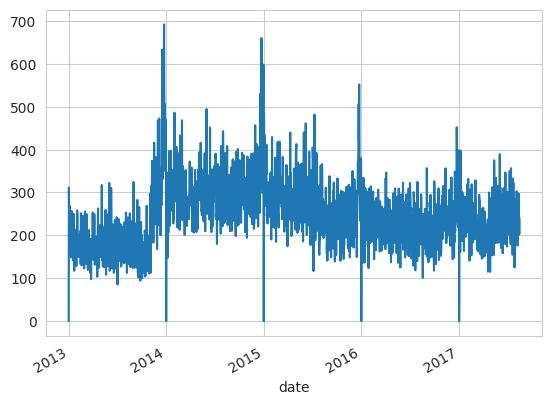

In [15]:
data_poultry.set_index("date").sales.plot()

Data pada 2017 belum lengkap (perlu trimming data)

<Axes: xlabel='date'>

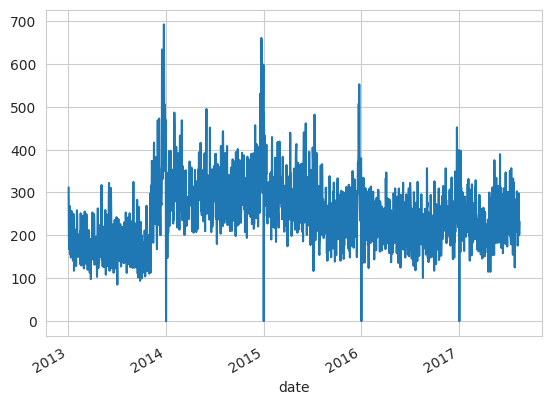

In [16]:
# Trimming Data row awal & akhir
data_poultry = data_poultry.iloc[1:-1,:].reset_index(drop=True)
data_poultry.set_index("date").sales.plot()


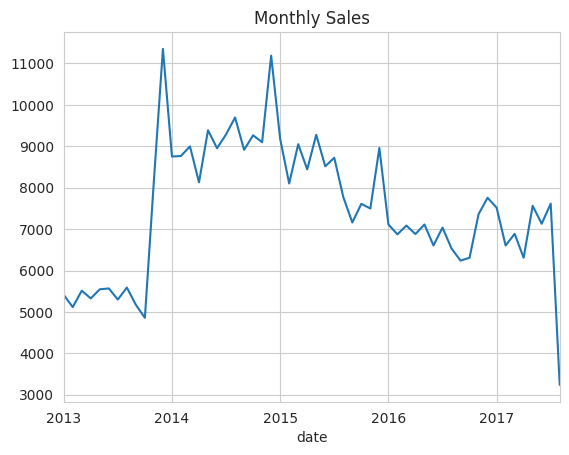

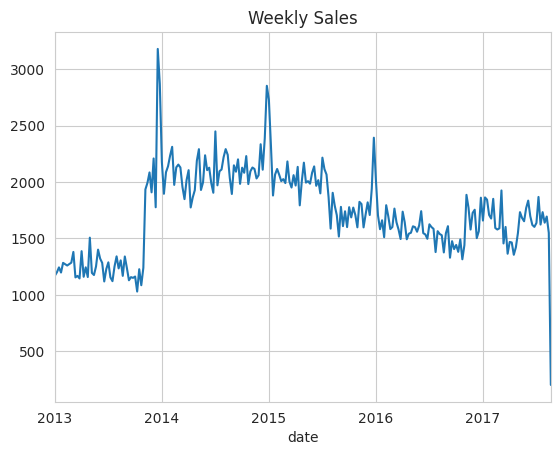

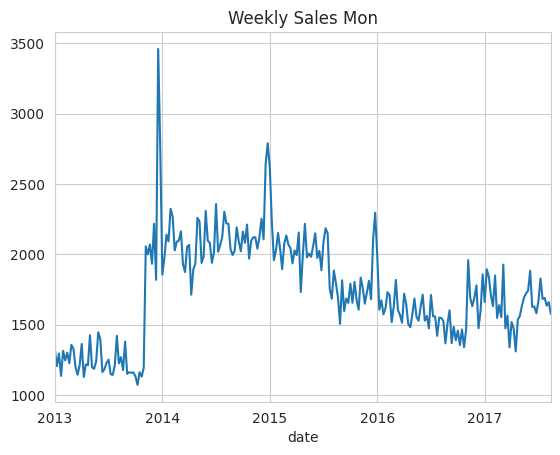

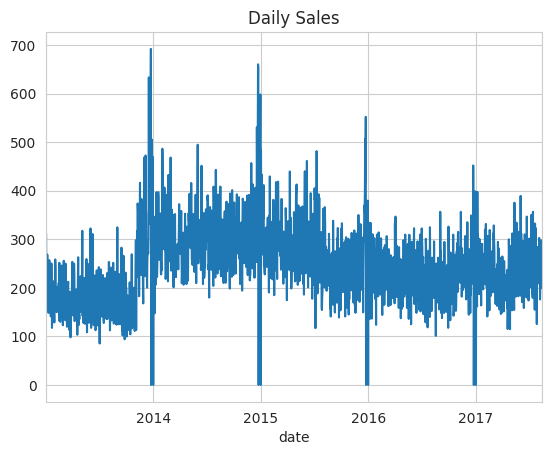

In [17]:
# Plot Data Sales (M,W,D)
data_poultry.set_index("date").sales.resample("M").sum().plot(kind="line")
plt.title("Monthly Sales")
plt.show()

data_poultry.set_index("date").sales.resample("W").sum().plot(kind="line")
plt.title("Weekly Sales")
plt.show()

data_poultry.set_index("date").sales.resample("W-MON").sum().plot(kind="line")
plt.title("Weekly Sales Mon")
plt.show()

data_poultry.set_index("date").sales.resample("D").sum().plot(kind="line")
plt.title("Daily Sales")
plt.show()

In [18]:
#Resample Data dengan Weekly Mon
#Normaliasasi data outliers dgn Log Normal

data_poultry = data_poultry.set_index("date").sales.resample("W-MON").sum()
data_poultry = np.log(data_poultry)
data_poultry.head()

date
2013-01-07    7.190568
2013-01-14    7.094783
2013-01-21    7.166572
2013-01-28    7.035306
2013-02-04    7.180741
Freq: W-MON, Name: sales, dtype: float64

In [19]:
# Setting Data Index untuk analisa time series lanjut secara weekly
data_poultry.index = pd.date_range(start=data_poultry.index.min(), end=data_poultry.index.max(), freq='W-MON')


In [20]:
# Stasioner Tet

from statsmodels.tsa.stattools import adfuller

def stationarity_test(series):
  """
  This function performs the Augmented Dickey-Fuller Test (ADF) on the provided series and prints the results.
  """
  result = adfuller(series)
  print("Augmented Dickey-Fuller Test:")
  labels = ['ADF Statistic', 'p-value', '#Lags', 'No. of Observations Used']
  for i, j in zip(result, labels):
    print(f"{j:25} = {i}")
  if result[1] <= 0.05:
    print("Conclusion: Time series is likely stationary.")
  else:
    print("Kesimpulan: Time series is likely non-stationary.")

stationarity_test(data_poultry)


Augmented Dickey-Fuller Test:
ADF Statistic             = -2.098101161305502
p-value                   = 0.24527881929995182
#Lags                     = 8
No. of Observations Used  = 232
Kesimpulan: Time series is likely non-stationary.


nilai P > 0.05, Data tidak Stasioner

In [21]:
#Differensiasi agar Data lebih Stasioner

data_poultry_diff = data_poultry.diff().dropna()
stationarity_test(data_poultry_diff)

Augmented Dickey-Fuller Test:
ADF Statistic             = -6.848002570517211
p-value                   = 1.7229265228217002e-09
#Lags                     = 7
No. of Observations Used  = 232
Conclusion: Time series is likely stationary.


Nilai P < 0.05, Data sudah dianggap Stasioner (Stabil), bisa digunakan untuk analisa time series lanjut

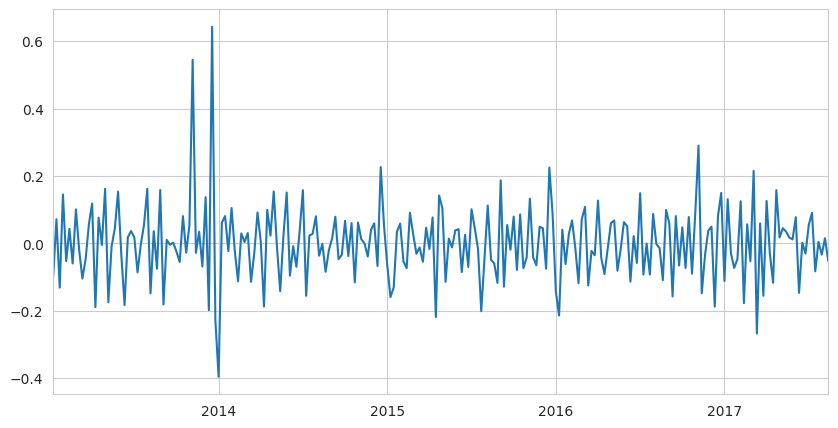

In [22]:
plot = data_poultry_diff.plot(figsize=(10,5))

# Cek ACF & PACF untuk Modelling Arima

In [23]:
# ACF & PACF

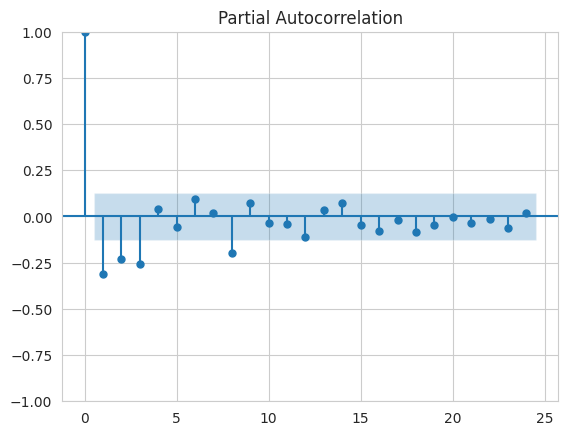

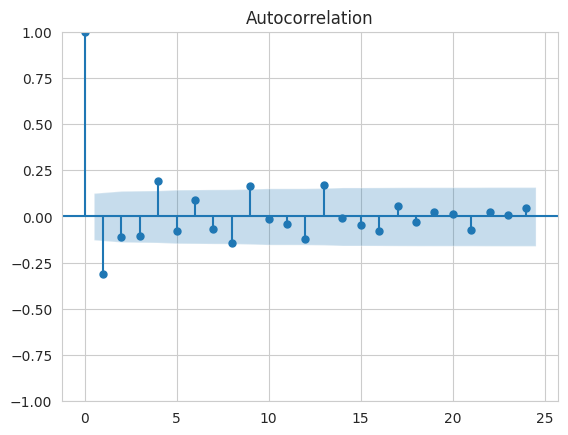

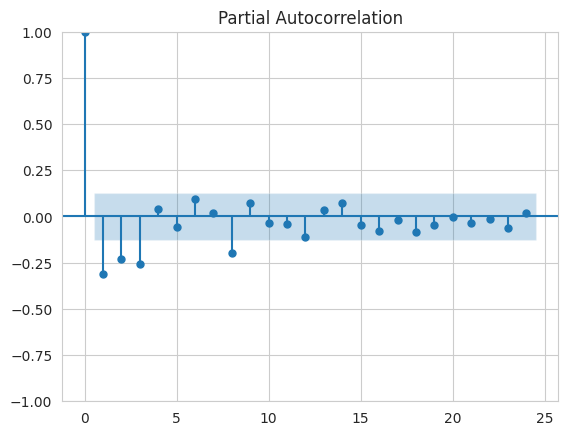

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_poultry_diff)
plot_pacf(data_poultry_diff)

P = 3,D=1, Q = 1

In [25]:
from statsmodels.tsa.arima.model import ARIMA

train_data = int(len(data_poultry_diff)*0.8)
train_data

192

In [26]:
data_poultry_diff.iloc[:train_data]

2013-01-14   -0.095785
2013-01-21    0.071789
2013-01-28   -0.131267
2013-02-04    0.145435
2013-02-11   -0.052447
                ...   
2016-08-15   -0.014237
2016-08-22   -0.109213
2016-08-29    0.099153
2016-09-05    0.059189
2016-09-12   -0.157390
Freq: W-MON, Name: sales, Length: 192, dtype: float64

In [27]:
from statsmodels.tsa.arima.model import ARIMA

train_data = int(len(data_poultry_diff)*0.8) # This was correct
train_data_series = data_poultry.iloc[:train_data] # Select the actual training data



In [28]:
print(train_data_series.dtype)

float64


In [29]:
arima_model = ARIMA(train_data_series, order=(3, 1, 1))
model = arima_model.fit()

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  192
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 165.225
Date:                Fri, 21 Jun 2024   AIC                           -320.450
Time:                        13:30:14   BIC                           -304.188
Sample:                    01-07-2013   HQIC                          -313.863
                         - 09-05-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6955      0.282     -2.468      0.014      -1.248      -0.143
ar.L2         -0.4278      0.112     -3.806      0.000      -0.648      -0.207
ar.L3         -0.3349      0.077     -4.337      0.0

In [30]:
#Predict Train

forecast_horizon = len(data_poultry_diff) - train_data
forecast_arima = model.forecast(steps=forecast_horizon)
mean_forecast = forecast_arima.mean()
print(f"Mean forecast: {mean_forecast}")


Mean forecast: 7.336253479870696


In [41]:
#Prediction test

# Predict Test
forecast_horizon = len(data_poultry_diff) - len(train_data) # Use len() to get the number of rows in the DataFrame
forecast_test = model.forecast(steps=forecast_horizon)[0]
print(f"Prediction test: {forecast_test}")


Prediction test: 7.352292516744919


In [49]:
# Predict Test
forecast_horizon = len(data_poultry_diff) - len(train_data) # Use len() to get the number of rows in the DataFrame
# The [0] was causing the issue by extracting only the first element of the forecast
forecast_test = model.forecast(steps=forecast_horizon)
print(f"Prediction test: {forecast_test}")

# RMSE test for data_poultry

from sklearn.metrics import mean_squared_error

# Extract the actual test data
test_data = data_poultry_diff.iloc[len(train_data):] # Use len(train_data) to get the starting index for the slice

# Perhitungan the RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

# Print the RMSE
print(f"RMSE test: {rmse}")

Prediction test: 2016-09-12    7.352293
2016-09-19    7.312442
2016-09-26    7.331822
2016-10-03    7.344384
2016-10-10    7.340702
2016-10-17    7.331399
2016-10-24    7.335237
2016-10-31    7.337781
2016-11-07    7.337485
2016-11-14    7.335317
2016-11-21    7.336100
2016-11-28    7.336582
2016-12-05    7.336638
2016-12-12    7.336131
2016-12-19    7.336298
2016-12-26    7.336380
2017-01-02    7.336421
2017-01-09    7.336301
2017-01-16    7.336340
2017-01-23    7.336350
2017-01-30    7.336367
2017-02-06    7.336338
2017-02-13    7.336347
2017-02-20    7.336348
2017-02-27    7.336353
2017-03-06    7.336346
2017-03-13    7.336348
2017-03-20    7.336348
2017-03-27    7.336350
2017-04-03    7.336348
2017-04-10    7.336349
2017-04-17    7.336348
2017-04-24    7.336349
2017-05-01    7.336348
2017-05-08    7.336348
2017-05-15    7.336348
2017-05-22    7.336349
2017-05-29    7.336348
2017-06-05    7.336348
2017-06-12    7.336348
2017-06-19    7.336348
2017-06-26    7.336348
2017-07-03    7.3

In [66]:
# prompt: rmse for train data

# RMSE train

# Extract the actual train data
train_data_actual = data_poultry_diff.iloc[:train_data]  # Use the integer directly for slicing

# Get the in-sample predictions for the train data
train_predictions = model.predict(start=1, end=len(train_data_actual)) # Generate predictions for the training set

# Calculate the RMSE
rmse_train = np.sqrt(mean_squared_error(train_data_actual, train_predictions))
# Print the RMSE
print(f"RMSE train: {rmse_train}")

RMSE train: 7.457478986278341


In [67]:
print(model.summary())
print(f'RMSE (Test Data): {rmse_test}')
print(f'RMSE (Train Data): {rmse_train}')

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  192
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 165.225
Date:                Fri, 21 Jun 2024   AIC                           -320.450
Time:                        14:39:33   BIC                           -304.188
Sample:                    01-07-2013   HQIC                          -313.863
                         - 09-05-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6955      0.282     -2.468      0.014      -1.248      -0.143
ar.L2         -0.4278      0.112     -3.806      0.000      -0.648      -0.207
ar.L3         -0.3349      0.077     -4.337      0.0

Nilai RMSE antara Test Data dan Train Data menunjukkan selisih yang tidak jauh berbeda hal ini menjelaskan bahwa data tsb tidak overfitting / underfitting. Namun secara nilai absolute nilai RMSE masih cukup tinggi dan bisa menggunakan pendekatan dengan model lainnya yang lebih baik

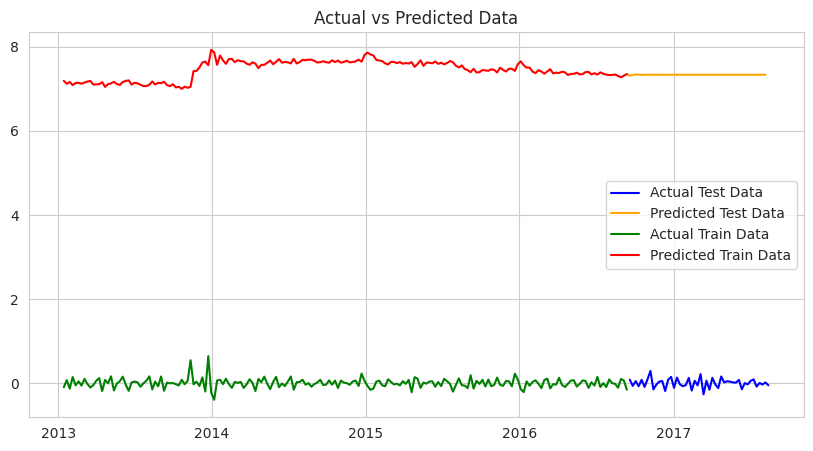

In [70]:
# Grafik

plt.figure(figsize=(10, 5))

# Plot the aktual test data
plt.plot(test_data, label="Actual Test Data", color="blue")

# Plot the predicted test data
plt.plot(forecast_test, label="Predicted Test Data", color="orange")

# Plot the aktual train data
plt.plot(train_data_actual, label="Actual Train Data", color="green")

# Plot the predicted train data
plt.plot(train_predictions, label="Predicted Train Data", color="red")

# Add a legend and title
plt.legend()
plt.title("Actual vs Predicted Data")
plt.show()


In [86]:
# prompt: create code for LSTM Model and print result in percent

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(train_data, train_data, epochs=80, batch_size=16, verbose=2)

# Make predictions
test_predictions = model.predict(test_data)

# Calculate the RMSE
rmse_test = np.sqrt(mean_squared_error(test_data, test_predictions))

# Print the RMSE in percent
print(f'RMSE (Test Data): {rmse_test * 100:.2f}%')


Epoch 1/80
12/12 - 5s - loss: 0.1362 - 5s/epoch - 393ms/step
Epoch 2/80
12/12 - 0s - loss: 0.0948 - 39ms/epoch - 3ms/step
Epoch 3/80
12/12 - 0s - loss: 0.0528 - 47ms/epoch - 4ms/step
Epoch 4/80
12/12 - 0s - loss: 0.0182 - 45ms/epoch - 4ms/step
Epoch 5/80
12/12 - 0s - loss: 0.0066 - 42ms/epoch - 3ms/step
Epoch 6/80
12/12 - 0s - loss: 0.0068 - 40ms/epoch - 3ms/step
Epoch 7/80
12/12 - 0s - loss: 0.0065 - 40ms/epoch - 3ms/step
Epoch 8/80
12/12 - 0s - loss: 0.0057 - 41ms/epoch - 3ms/step
Epoch 9/80
12/12 - 0s - loss: 0.0052 - 44ms/epoch - 4ms/step
Epoch 10/80
12/12 - 0s - loss: 0.0051 - 82ms/epoch - 7ms/step
Epoch 11/80
12/12 - 0s - loss: 0.0047 - 94ms/epoch - 8ms/step
Epoch 12/80
12/12 - 0s - loss: 0.0044 - 87ms/epoch - 7ms/step
Epoch 13/80
12/12 - 0s - loss: 0.0041 - 78ms/epoch - 7ms/step
Epoch 14/80
12/12 - 0s - loss: 0.0040 - 76ms/epoch - 6ms/step
Epoch 15/80
12/12 - 0s - loss: 0.0039 - 79ms/epoch - 7ms/step
Epoch 16/80
12/12 - 0s - loss: 0.0040 - 73ms/epoch - 6ms/step
Epoch 17/80
12/12

2/2 [==============================] - 1s 8ms/step
RMSE (Test Data): 0.64%


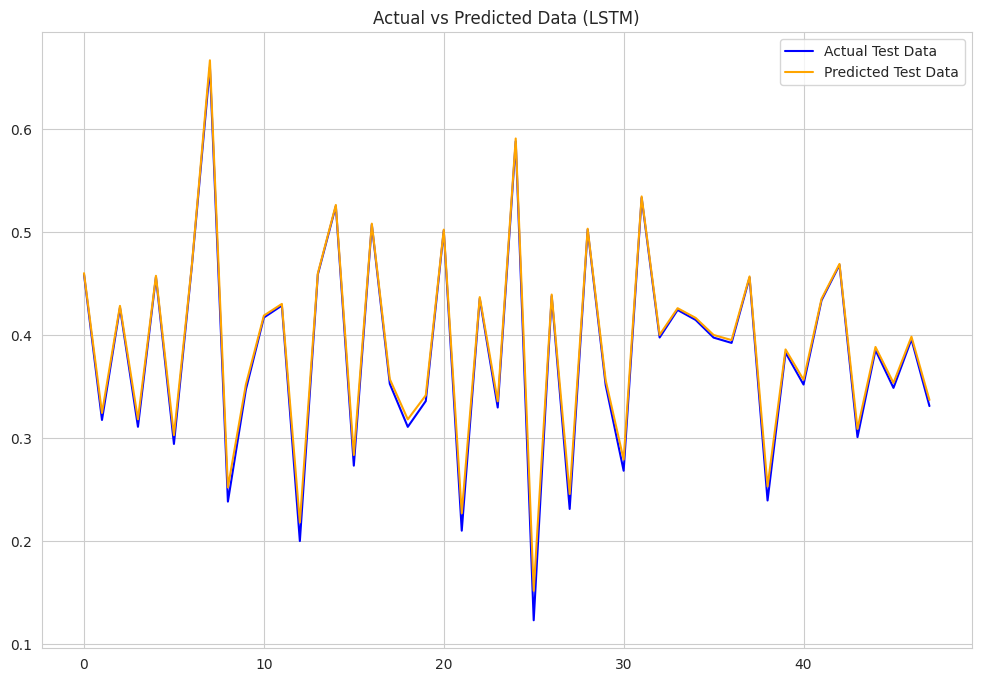

In [84]:
#Grafik LSTM Aktual & Predict

plt.figure(figsize=(12, 8))

# Plot the actual test data
plt.plot(test_data, label="Actual Test Data", color="blue")

# Plot the predicted test data
plt.plot(test_predictions, label="Predicted Test Data", color="orange")

# Add a legend and title
plt.legend()
plt.title("Actual vs Predicted Data (LSTM)")

# Show the plot
plt.show()


In [3]:
# prompt: predict using regression model

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(train_data, train_data)

# Predict the test data
predicted_test_data = model.predict(test_data)

# Calculate the RMSE for the test data
rmse_test = np.sqrt(mean_squared_error(test_data, predicted_test_data))

# Print the RMSE
print(f"RMSE (Test Data): {rmse_test}")



NameError: name 'train_data' is not defined